<span style="font-size: 6px; float:right">Notebook created by Mateusz Guzik<a style="text-decoration: none; color:#000;"></a></span>
<br>
<center><font size="6"><b>Digital Signal Processing Lab</b></font></center>
<br />
<center><font size="5"><b><u>Resampling</u></b></font></center>

My name is Mariusz Więcławek.
If you have collaborated with other peers while working on this notebook, please annouce theirs names below.
- Michał Woźniak

# Introducion

Since the desired signal sampling frequency varies between applications there is a need for a method to control it. Within this notebook you will learn to downsample and upsample a signal by implemening different resampling methods.

## Reading list

Before working with the notebook, you might find it useful to become acquainted with the following materials:
- <span style="font-size: 12px">Section **12.6.3. Filtr interpolatora i decymatora cyfrowego** from “Cyfrowe przetwarzanie sygnałów : od teorii do zastosowań, WKŁ 2014” by T. P. Zieliński.</span>
- <span style="font-size: 12px">Section **18.2.1. Decymator i interpolator** from “Cyfrowe przetwarzanie sygnałów : od teorii do zastosowań, WKŁ 2014” by T. P. Zieliński.</span>

## Notebook setup

In [231]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal

# Downsampling

We can reduce the signal sampling frequency $\large f_s$ by removing the excess samples according to

$$\large
    y_K(n)=x(nK),
$$
where $\large x(n)$ is the original signal, $\large y_K(n)$ is the downsampled signal and $\large K$ is the downsampling factor. By doing so the resulting sampling frequency $\large f_{s_K}$ of the downsampled signal is equal to $\large \frac{f_s}{K}$.

Complete the function below. It should perform the downsampling operation on a signal $\large x$, sampled at timestamps $\large t$. Besides of implementing the above formula, it should also bo able to return new timestamps $\large t_K$, at which the downsampled signal $\large y_K$ is sampled.

In [245]:
def downsample(x, K, t=None):
    """
    This function downsamples a given signal K-times. It also returns new timestamps if they were given. 
    
    Parameters:
        x - Vector to decimate.
        t - Timestamps.
        K - Decimation factor. It should be an integer.
    
    Returns:
        y_K - Decimated signal.
        t_K - New timestamps.
    """
    
    "Your code goes below here."

    y_K = np.array([])
    y_K = x[::K]
    
    if t is None:       
        return y_K
    
    t_K = np.array([])
    i=0
    while i<len(t):
        t_K = np.append(t_K,t[i])
        i = i+K
        
    return y_K, t_K   

### Verify your implementation
Check if your function works in the cell below. Try different values of $\large K$.

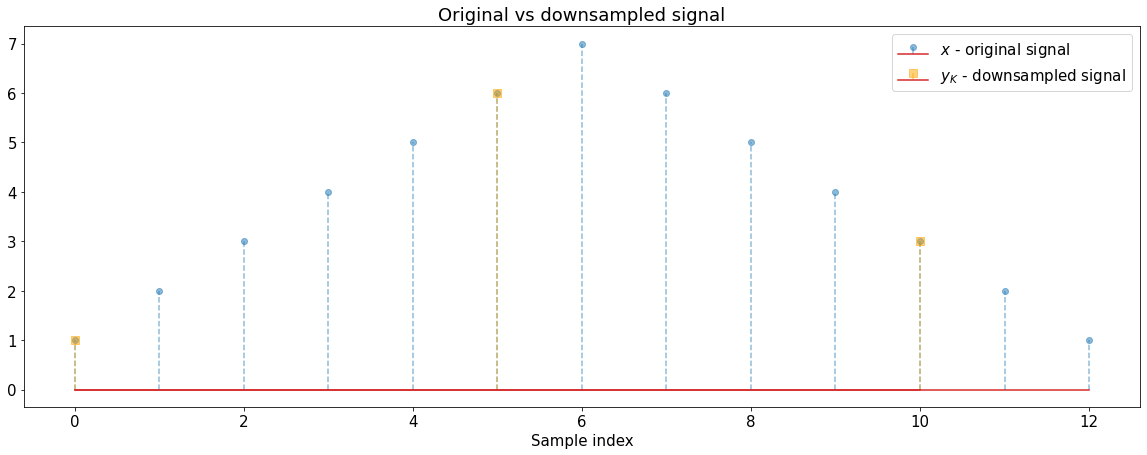

In [246]:
K = 5
x = np.array([1, 2, 3, 4, 5, 6, 7, 6, 5, 4, 3, 2, 1])
t = np.arange(len(x))

y_d, t_d = downsample(x, K, t)

plt.figure(figsize=(20, 7))

markers, stemlines, baseline = plt.stem(t, x, use_line_collection=True, label='$x$ - original signal')
plt.setp(stemlines, linestyle="--", alpha=0.5)
plt.setp(markers, alpha=0.5)

markers, stemlines, baseline = plt.stem(t_d, y_d, use_line_collection=True, label='$y_K$ - downsampled signal')
plt.setp(stemlines, linestyle="--", color="orange", alpha=0.5)
plt.setp(markers, marker='s', markersize=8, color="orange", alpha=0.5)

plt.title('Original vs downsampled signal')
plt.xlabel('Sample index')
plt.rc('font', size=15)
plt.legend()
plt.show()

# Upsampling

To increase the signal sampling frequency $\large f_s$ we introduce the additional samples by

$$\large
    y_L(n)=
        \begin{cases}
            x(n/L), & \text{n=0, $\pm$ L, $\pm$ 2L, ...}\\
            0 & \text{otherwise}
        \end{cases} 
$$
    
As a result the sampling frequency of the upsampled signal $\large  y_L$ is equal to $\large  f_{s_L} = L * f_s$.

Complete the function below. It should perform the upsampling operation on a signal $\large x$, sampled at timestamps $t$.
Besides of implementing the above formula, it should also be able to return new timestamps $\large t_L$, at which the upsampled signal $\large y_L$ is sampled.

In [247]:
def upsample(x, L, t=None):
    """
    This function upsamples a given signal L-times. It also returns new timestamps if they were given.
    
    Parameters:
        x - Vector to expand.
        L - Expansion factor. It should be an integer.
    
    Returns:
        y_L - Expanded signal.
        t_L - New timestamps.
    """
    
    "Your code goes below here."
    
    y_L = np.zeros((len(x)*L))
    y_L[0:len(y_L):L] = x

    
    if t is None:       
        return y_L
    
    dt = t[2] - t[1]
    dtL = dt/(L)
    t_L = np.arange(0,max(t)+L*dtL,dtL)
    
    return y_L, t_L

### Verify your implementation
Check if your function works in the next cell. Try different values of $\large L$.

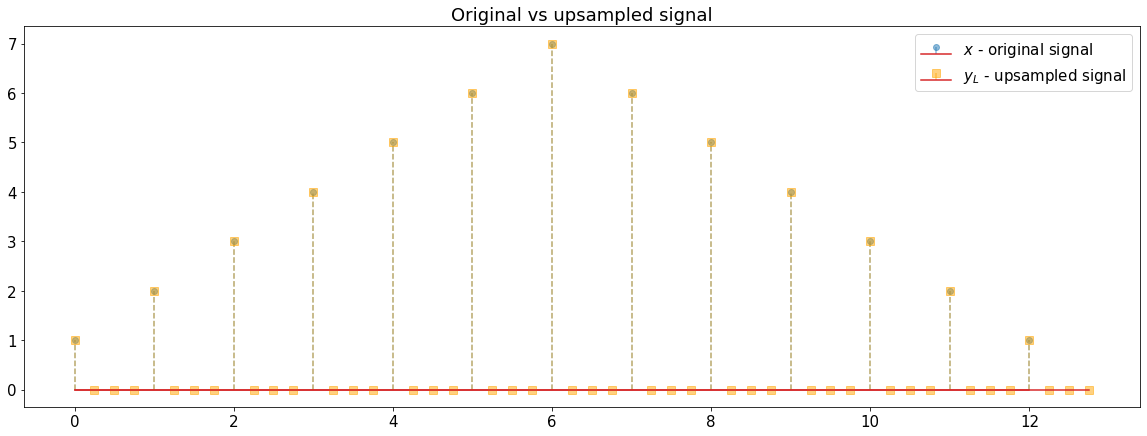

In [248]:
L = 4

y_L, t_L = upsample(x, L, t)

plt.figure(figsize=(20, 7))

markers, stemlines, baseline = plt.stem(t, x, use_line_collection=True, label='$x$ - original signal')
plt.setp(stemlines, linestyle="--", alpha=0.5)
plt.setp(markers, alpha=0.5)

markers, stemlines, baseline = plt.stem(t_L, y_L, use_line_collection=True, label='$y_L$ - upsampled signal')
plt.setp(stemlines, linestyle="--", color="orange", alpha=0.5)
plt.setp(markers, marker='s', markersize=8, color="orange", alpha=0.5)

plt.title('Original vs upsampled signal')
plt.rc('font', size=15)
plt.legend()
plt.show()

Look what happens if we perform both operations - first upsample and then downsample a signal. Try different values of $\large K$ and $\large L$.

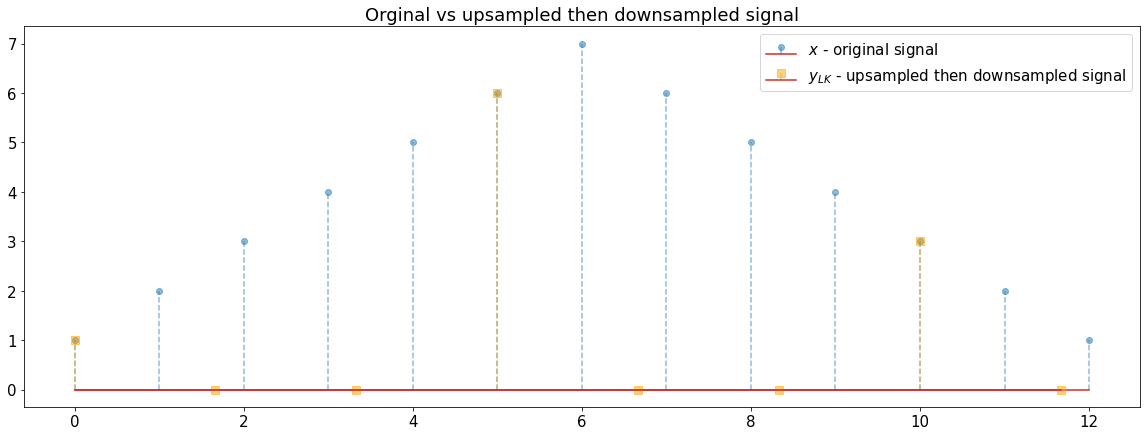

In [249]:
L = 3
K = 5

y_L, t_e = upsample(x, L, t)
y_K, t_d = downsample(y_L, K, t_e)

plt.figure(figsize=(20, 7))

markers, stemlines, baseline = plt.stem(t, x, use_line_collection=True, label='$x$ - original signal')
plt.setp(stemlines, linestyle="--", alpha=0.5)
plt.setp(markers, alpha=0.5)

markers, stemlines, baseline = plt.stem(t_d, y_K, use_line_collection=True, label='$y_{LK}$ - upsampled then downsampled signal')
plt.setp(stemlines, linestyle="--", color="orange", alpha=0.5)
plt.setp(markers, marker='s', markersize=8, color="orange", alpha=0.5)

plt.title('Orginal vs upsampled then downsampled signal')
plt.rc('font', size=15)
plt.legend()
plt.show()

Now check what happens if we do the operations in oposite order - first downsample then upsample a signal. Try different $\large K$ and $\large L$.

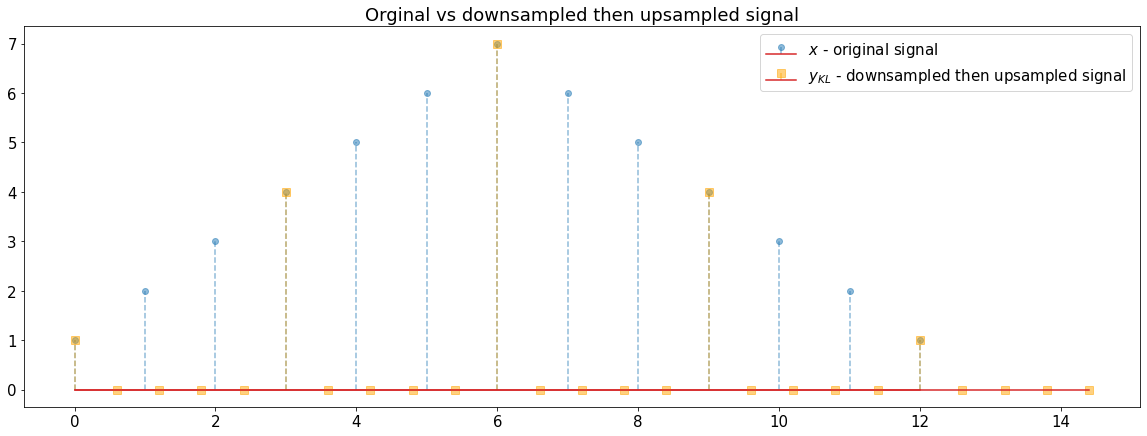

In [250]:
K = 3
L = 5

y_K, t_K = downsample(x, K, t)
y_L, t_L = upsample(y_K, L, t_K)


plt.figure(figsize=(20, 7))

markers, stemlines, baseline = plt.stem(t, x, use_line_collection=True, label='$x$ - original signal')
plt.setp(stemlines, linestyle="--", alpha=0.5)
plt.setp(markers, alpha=0.5)

markers, stemlines, baseline = plt.stem(t_L, y_L, use_line_collection=True, label='$y_{KL}$ - downsampled then upsampled signal')
plt.setp(stemlines, linestyle="--", color="orange", alpha=0.5)
plt.setp(markers, marker='s', markersize=8, color="orange", alpha=0.5)

plt.title('Orginal vs downsampled then upsampled signal')
plt.rc('font', size=15)
plt.legend()
plt.show()

**Question**: What is the proper order of performing the two operations? Why is that?

**Answer**: Najpierw powinniśmy wykonywać operacje nadpróbkowania, ponieważ gdybyśmy wykonali najpierw podpróbkowanie  wykluczylibyśmy próbki przenoszące istotne wartości, dlatego lepiej uzupełnic sygnał próbkami o wartościach zerowych i później zredukować ilość próbek.

# Influence on spectrum
The signal spectrum after downsampling is given by

$$\large
    y_K \left(
            e^{j \Omega} 
        \right)
    =
    \frac{1}{K} 
    \sum_{k=0}^{K-1} 
    X \left(
            e^{j \left(
                     \Omega - 2 \Pi k
               \right)/K}                
        \right),
$$

whereas in the upsampling case it is given by

$$\large
    y_L \left(
            e^{j \Omega} 
        \right)
    =
    X \left(
            e^{j \Omega L}                
      \right),
$$

where

$$\large \Omega = 2 \Pi \frac{f}{f_s}.$$

Let's see what are the implications of the above equations. First, we will see what happens to the signal spectrum after the downsampling operation. Try different values of $\large K$.

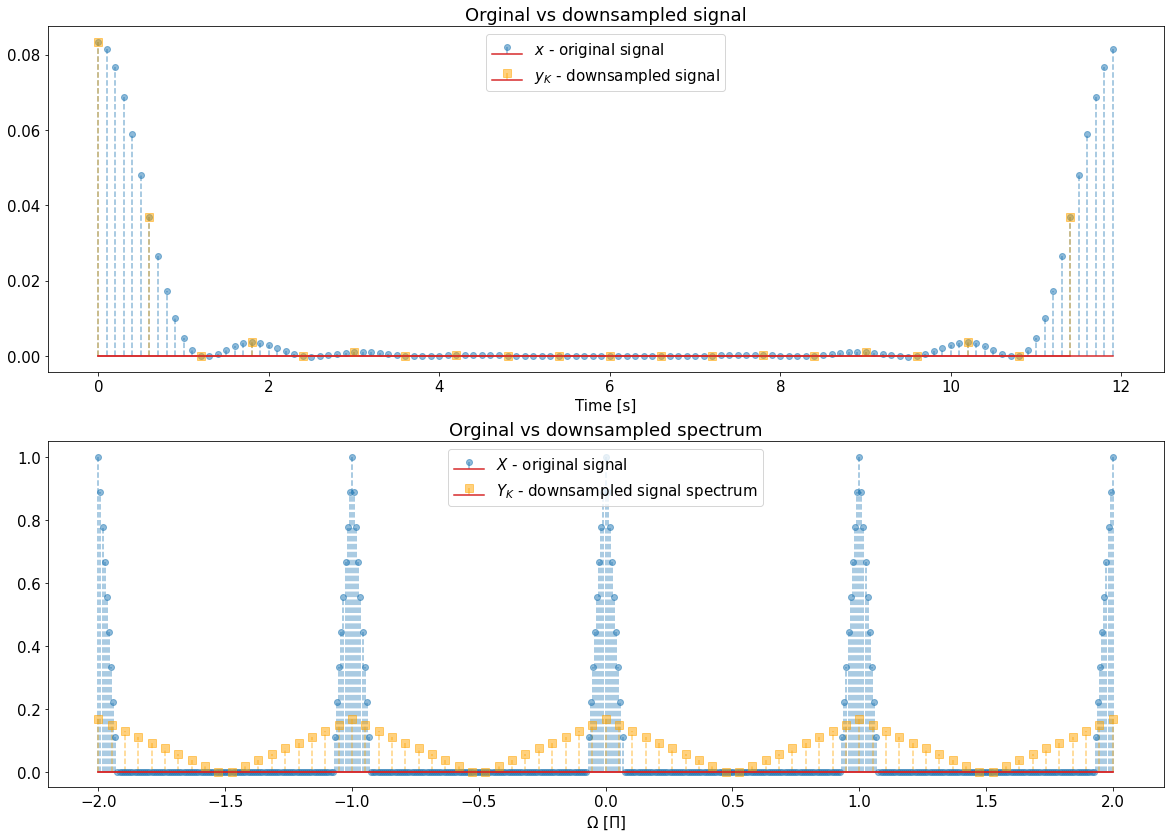

In [251]:
K = 6

X = np.concatenate((np.linspace(1, 0, 10), np.zeros(50)))
X = np.concatenate((X, X[::-1]))

x = np.fft.ifft(X)
t = np.arange(len(x)) * 0.1

y_K, t_K = downsample(x, K, t)

Y_K = np.fft.fft(y_K)

X_rep = np.concatenate((X[::-1], X[1:]))
X_rep = np.concatenate((X_rep[::-1], X_rep[1:]))
omega_X_rep = np.linspace(-2, 2, len(X_rep))

Y_K_rep = np.concatenate((Y_K[::-1], Y_K[1:]))
Y_K_rep = np.concatenate((Y_K_rep[::-1], Y_K_rep[1:]))
omega_Y_K_rep = np.linspace(-2, 2, len(Y_K_rep))


fig, ax = plt.subplots(2, 1, figsize=(20, 14))

markers, stemlines, baseline = ax[0].stem(t, x.real, use_line_collection=True, label='$x$ - original signal')
plt.setp(stemlines, linestyle="--", alpha=0.5)
plt.setp(markers, alpha=0.5)
markers, stemlines, baseline = ax[0].stem(t_K, y_K.real, use_line_collection=True, label='$y_K$ - downsampled signal')
plt.setp(stemlines, linestyle="--", color="orange", alpha=0.5)
plt.setp(markers, marker='s', markersize=8, color="orange", alpha=0.5)
ax[0].set_title('Orginal vs downsampled signal')
ax[0].set_xlabel('Time [s]')
ax[0].legend()

markers, stemlines, baseline = ax[1].stem(omega_X_rep, X_rep, use_line_collection=True, label='$X$ - original signal')
plt.setp(stemlines, linestyle="--", alpha=0.5)
plt.setp(markers, alpha=0.5)
markers, stemlines, baseline = ax[1].stem(omega_Y_K_rep, Y_K_rep.real, use_line_collection=True, label='$Y_K$ - downsampled signal spectrum')
plt.setp(stemlines, linestyle="--", color="orange", alpha=0.5)
plt.setp(markers, marker='s', markersize=8, color="orange", alpha=0.5)
ax[1].set_title('Orginal vs downsampled spectrum')
ax[1].set_xlabel('$\Omega$ [$\Pi$]')
ax[1].legend()

plt.rc('font', size=15)
plt.show()

Now, see what happens to the same signal $\large x$ after expansion. Try different values of $\large L$.

<ipython-input-247-6b31eee7e4db>:17: ComplexWarning: Casting complex values to real discards the imaginary part
  y_L[0:len(y_L):L] = x


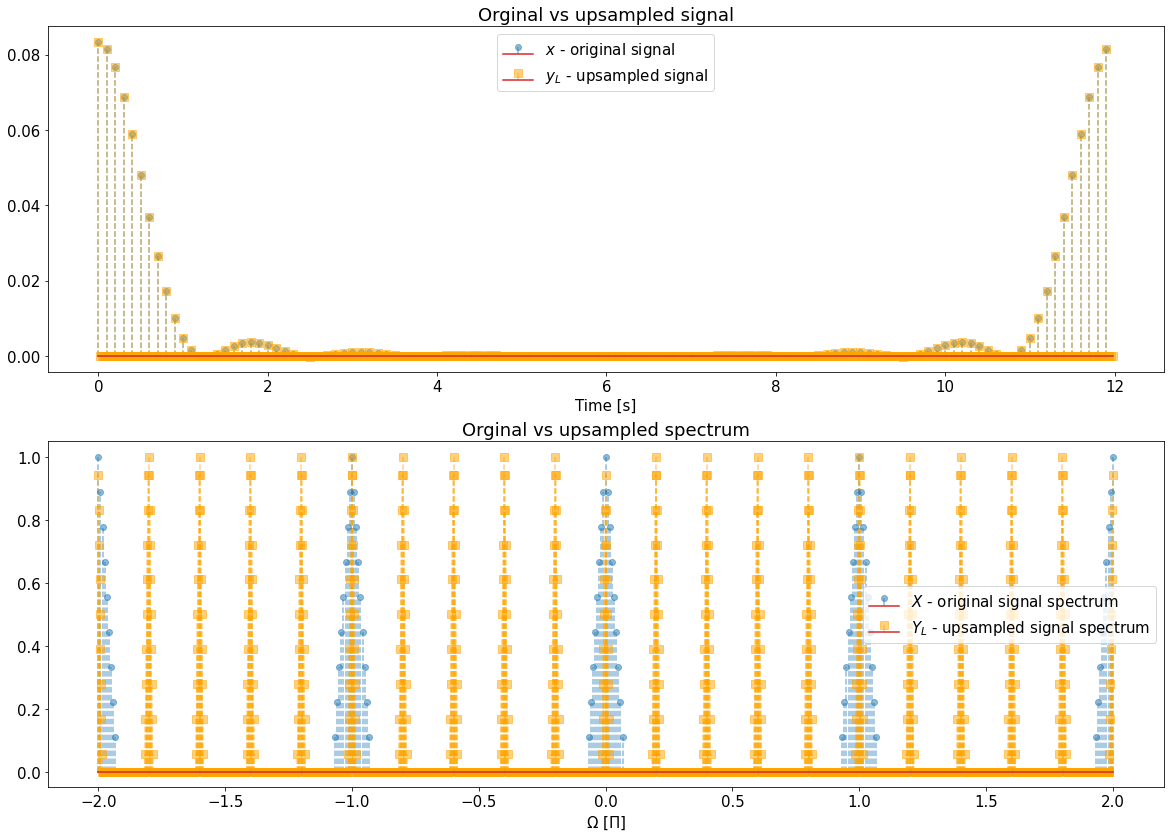

In [252]:
L = 5

y_L, t_L = upsample(x, L, t)

Y_L = np.fft.fft(y_L)

Y_L_rep = np.concatenate((Y_L[::-1], Y_L[1:]))
Y_L_rep = np.concatenate((Y_L_rep[::-1], Y_L_rep[1:]))
omega_Y_L_rep = np.linspace(-2, 2, len(Y_L_rep))


fig, ax = plt.subplots(2, 1, figsize=(20, 14))

markers, stemlines, baseline = ax[0].stem(t, x.real, use_line_collection=True, label='$x$ - original signal')
plt.setp(stemlines, linestyle="--", alpha=0.5)
plt.setp(markers, alpha=0.5)
markers, stemlines, baseline = ax[0].stem(t_L, y_L.real, use_line_collection=True, label='$y_L$ - upsampled signal')
plt.setp(stemlines, linestyle="--", color="orange", alpha=0.5)
plt.setp(markers, marker='s', markersize=8, color="orange", alpha=0.5)
ax[0].set_title('Orginal vs upsampled signal')
ax[0].set_xlabel('Time [s]')
ax[0].legend()

markers, stemlines, baseline = ax[1].stem(omega_X_rep, X_rep, use_line_collection=True, label='$X$ - original signal spectrum')
plt.setp(stemlines, linestyle="--", alpha=0.5)
plt.setp(markers, alpha=0.5)
markers, stemlines, baseline = ax[1].stem(omega_Y_L_rep, Y_L_rep.real, use_line_collection=True, label='$Y_L$ - upsampled signal spectrum')
plt.setp(stemlines, linestyle="--", color="orange", alpha=0.5)
plt.setp(markers, marker='s', markersize=8, color="orange", alpha=0.5)
ax[1].set_title('Orginal vs upsampled spectrum')
ax[1].set_xlabel('$\Omega$ [$\Pi$]')
ax[1].legend()

plt.rc('font', size=15)
plt.show()

For better understanding let's look at another example. This time we will create a different signal $\large x$ with simpler spectrum. It is sampled at $\large f_s$ equal to 100 Hz and contains two sinusoidal components with frequencies 20 and 40 Hz. Look at the spectra of original, downsampled and upsampled signal. Try different values of $\large K$ and $\large L$ and observe the peaks in spectra. Focus on their position, number and amplitude.

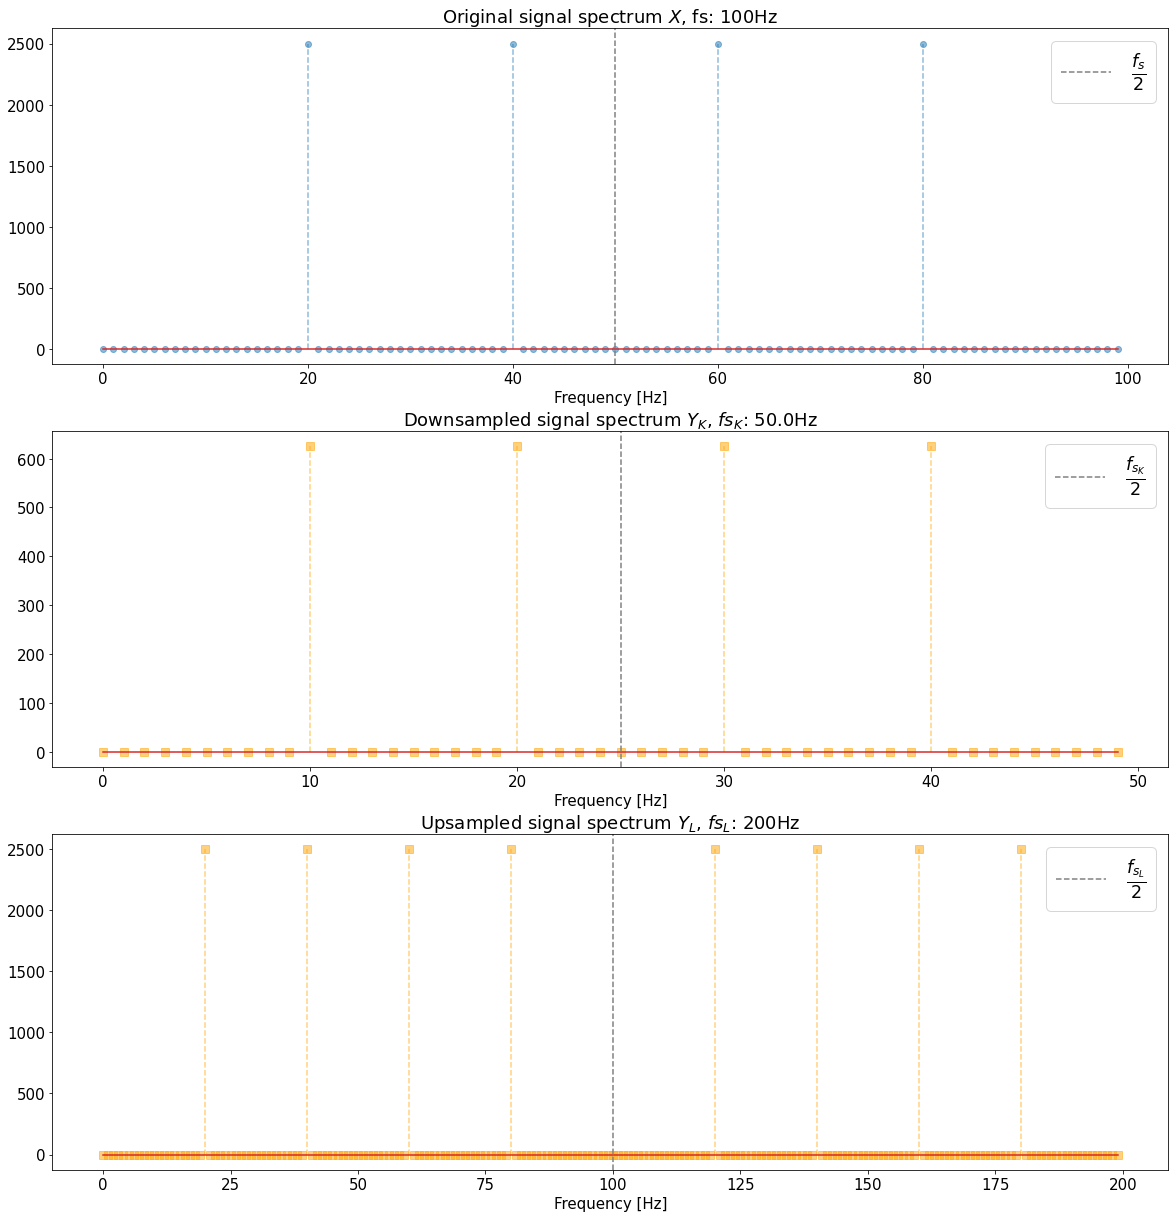

In [253]:
K = 2
L = 2

fs = 100
f1 = 20
f2 = 40
t = np.arange(fs) * 1/fs
x = np.sin(2*np.pi*f1*t) + np.sin(2*np.pi*f2*t)
X = np.fft.fft(x)
f = np.arange(0, fs, fs/len(x))

y_K = downsample(x, K)
fs_K = fs/K
Y_K = np.fft.fft(y_K)
f_K = np.arange(0, fs_K, fs_K/(len(y_K)))

y_L = upsample(x, L)
fs_L = fs*L
Y_L = np.fft.fft(y_L)
f_L = np.arange(0, fs_L, fs_L/(len(y_L)))

fig, ax = plt.subplots(3, 1, figsize=(20, 21))

markers, stemlines, baseline = ax[0].stem(f, np.abs(X)**2, use_line_collection=True)
plt.setp(stemlines, linestyle="--", alpha=0.5)
plt.setp(markers, alpha=0.5)
ax[0].axvline(fs/2, linestyle="--", color='grey', label=r'$\frac{f_s}{2}$')
ax[0].set_title('Original signal spectrum $X$, fs: ' + str(fs) + 'Hz')
ax[0].set_xlabel('Frequency [Hz]')
ax[0].legend(fontsize=25)

markers, stemlines, baseline = ax[1].stem(f_K, np.abs(Y_K)**2, use_line_collection=True)
plt.setp(stemlines, linestyle="--", color="orange", alpha=0.5)
plt.setp(markers, marker='s', markersize=8, color="orange", alpha=0.5)
ax[1].axvline(fs_K/2, linestyle="--", color='grey', label=r'$\frac{f_{s_K}}{2}$')
ax[1].set_title('Downsampled signal spectrum $Y_K$, $fs_K$: ' + str(fs_K) + 'Hz')
ax[1].set_xlabel('Frequency [Hz]')
ax[1].legend(fontsize=25)

markers, stemlines, baseline = ax[2].stem(f_L, np.abs(Y_L)**2, use_line_collection=True)
plt.setp(stemlines, linestyle="--", color="orange", alpha=0.5)
plt.setp(markers, marker='s', markersize=8, color="orange", alpha=0.5)
ax[2].axvline(fs_L/2, linestyle="--", color='grey', label=r'$\frac{f_{s_L}}{2}$')
ax[2].set_title('Upsampled signal spectrum $Y_L$, $fs_L$: ' + str(fs_L) + 'Hz')
ax[2].set_xlabel('Frequency [Hz]')
ax[2].legend(fontsize=25)

plt.rc('font', size=15)
plt.show()

**Question**: How does downsampling affect the spectrum?

**Answer**:Podpróbkowanie zmniejsza częstotliwość próbkowania K krotnie, oraz zmniejsza amplitude sygnału. Pojawiły się również wartości amplitud w widmie sygnału dla częstotliwości f=10 Hz oraz f=30 Hz, wynikające z symetri widma względem częst. Nyquista.

**Question**: How does upsampling affect the spectrum?

**Answer**:Nadpróbkowanie zwiększa częst. próbkowania L krotnie, oraz zwiększa amplitude sygnału. Jak widać na wykresie, początkowo nasza częst Nyquista wynosiła fn=50 Hz, po zastosowaniu upsamplingu nasze pasmo poserzyło się 4krotnie. Zmieniając częst. Nyquista nasze wartości amplitudy wynikające z symetrii widma pozostały, zmieniła się częstotl. Nyquista do fn=100 Hz stąd 4 wartości zostały odbite względem punktu symetrii.

**Question**: Why do we sometimes get additional components in the spectrum? When does it happen?

**Answer**: W przypadku downsamplingu zmniejszając częst. Nyquista niektóre wartości amplitud mogą wyjśc poza tą wartość częstotliwości, przez co odbijają się względem symetrii co może wpłynąc na błędne odtworzenie sygnału. W przypadku nadpróbkowania zwiększając częst. Nyquista uwzględniamy wartości amplitud, które wychodziły poza jej zakres. 

# Anti-aliasing filter

For a successful resampling operation an unchanged structure of the spectrum is desired. To get rid of the unwanted influence on spectrum we need to apply a low-pass filter. The pictures below show diagrams of the polyphase downsampler and upsampler.

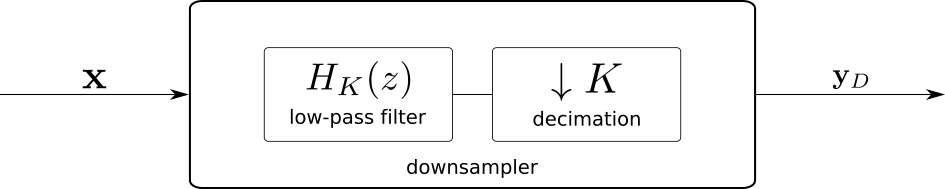

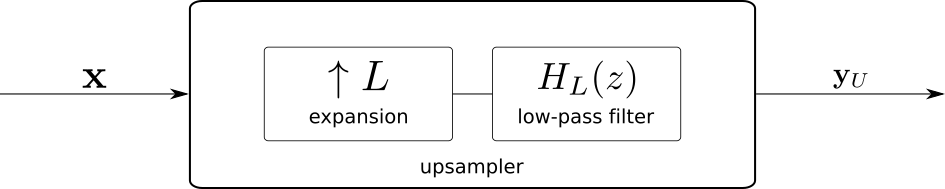

Based on the diagrams and previous tasks think what is the proper way to resample a signal. How would you change a signal sampling frequency $\large f_s$ from 100 Hz so that the sampling frequency $\large f_{s_R}$ of the resampled signal $\large y_R$ is equal to 175 Hz? Do we need to perform every single operation from the above diagrams? What would be the order of operations and overall optimal solution?

Answer the questions by completing the function below. It should perform the resampling operation on a signal $\large x$, sampled at timestamps $\large t$.It should also bo able to return new timestamps $\large t_r$, at which the resampled signal $\large y_R$ is sampled. The sampling frequency of the resampled signal $\large y_R$ should be equal to $\large f_{s_R} = L * \frac{f_s}{K}$. You can scale the amplitude of the resampled signal by multiplying it by a factor that depends on the filter bandwidth.

In [254]:
def resample(x, L, K, t=None):
    """
    This function resamples a given signal.
    The resulting sampling frequency depends on L/K.
    It also returns new timestamps if they were given.
    
    Parameters
        x - Vector to resample.
        L - Expansion factor. It should be an integer.
        K - Decimation factor. It should be an integer.
        t - Timestamps.
    
    Returns:
        y_R - Resampled signal.
        t_R - New timestamps.
    """
    
    "Your code goes below here."
    
    y_L, t_L = upsample(x, L, t) 

    h_LP = scipy.signal.firwin(211, 1/L, pass_zero='lowpass')   
    y_L = np.convolve(y_L, h_LP,mode='same')
    
    y_R, t_R = downsample(y_L, K, t_L)
    y_R = y_R*L
    
    return y_R, t_R

### Verify your implementation
Use your function to resample the signal $\large x$ from the previous task. Place the resampled signal in a variable called `y_R`, the timestamps in `t_R` and the new sampling frequency in `fs_R`. Try to get different sampling frequencies but once you finish experimenting leave the signal resampled to 175Hz.

In [255]:
"Your code goes below here."
fs = 100
f = np.arange(0, fs, fs/len(x))
f1 = 20
f2 = 40
t = np.arange(fs) * 1/fs
x = np.sin(2*np.pi*f1*t) + np.sin(2*np.pi*f2*t)

y_R, t_R = resample(x, 7, 4, t)
fs_R = len(t_R)

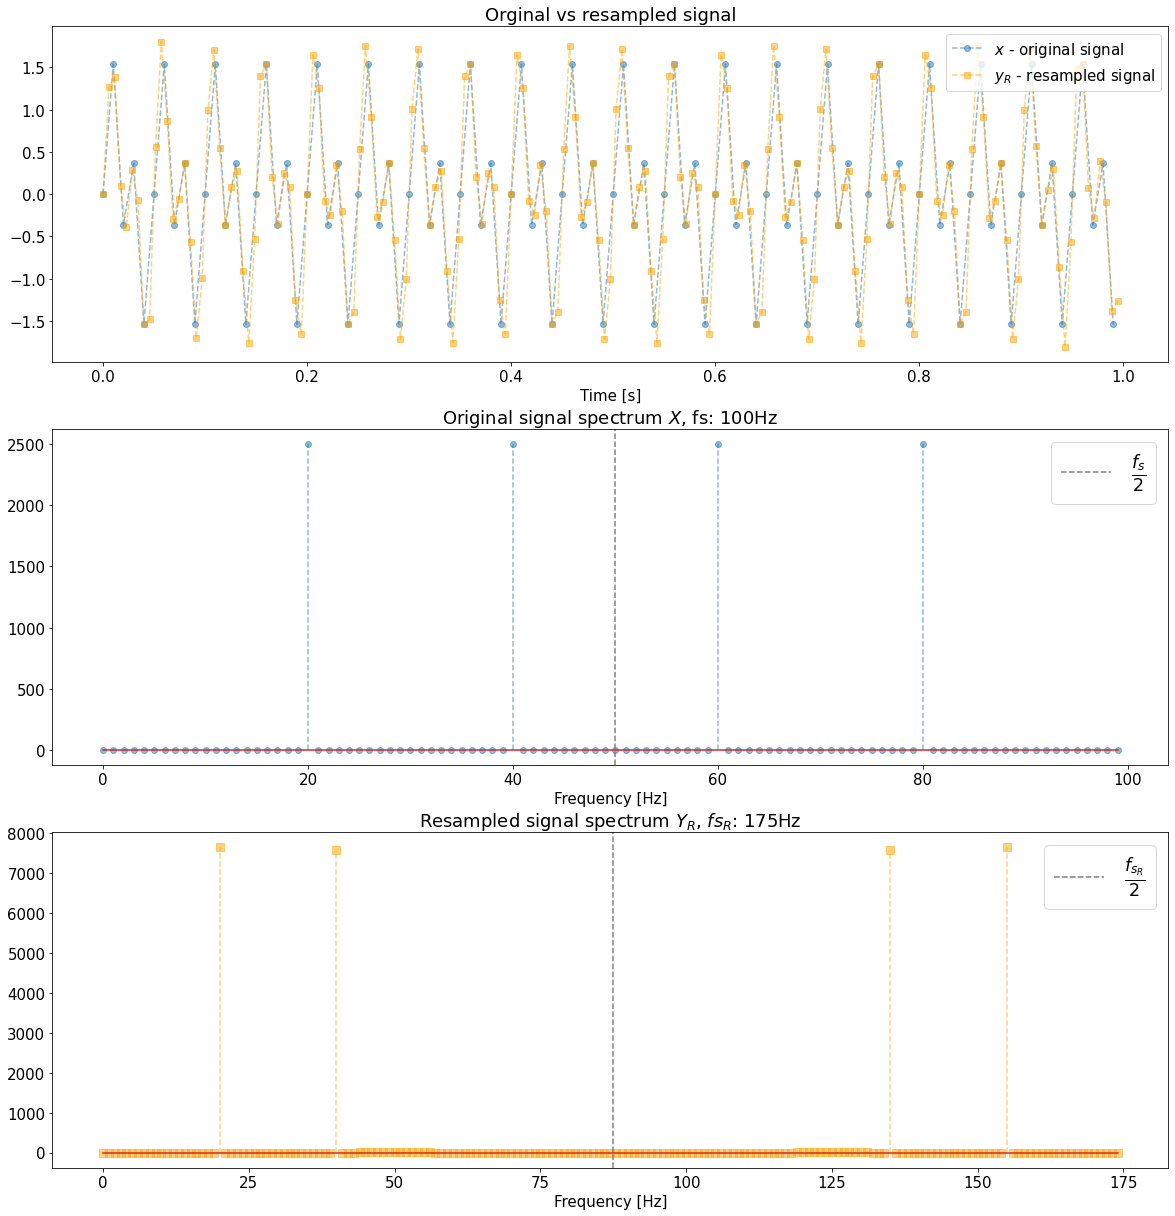

In [257]:
Y_R = np.fft.fft(y_R)
f_R = np.arange(0, fs_R, fs_R/(len(y_R)))

fig, ax = plt.subplots(3, 1, figsize=(20, 21))

ax[0].plot(t, x.real, 'o--', alpha=0.5, label='$x$ - original signal')
ax[0].plot(t_R, y_R.real, 's--', color="orange", alpha=0.5, label='$y_R$ - resampled signal')
ax[0].set_title('Orginal vs resampled signal')
ax[0].set_xlabel('Time [s]')
ax[0].legend()

markers, stemlines, baseline = ax[1].stem(f, np.abs(X)**2, use_line_collection=True)
plt.setp(stemlines, linestyle="--", alpha=0.5)
plt.setp(markers, alpha=0.5)
ax[1].axvline(fs/2, linestyle="--", color='grey', label=r'$\frac{f_s}{2}$')
ax[1].set_title('Original signal spectrum $X$, fs: ' + str(fs) + 'Hz')
ax[1].set_xlabel('Frequency [Hz]')
ax[1].legend(fontsize=25)

markers, stemlines, baseline = ax[2].stem(f_R, np.abs(Y_R)**2, use_line_collection=True)
plt.setp(stemlines, linestyle="--", color="orange", alpha=0.5)
plt.setp(markers, marker='s', markersize=8, color="orange", alpha=0.5)
ax[2].axvline(fs_R/2, linestyle="--", color='grey', label=r'$\frac{f_{s_R}}{2}$')
ax[2].set_title('Resampled signal spectrum $Y_R$, $fs_R$: ' + str(fs_R) + 'Hz')
ax[2].set_xlabel('Frequency [Hz]')
ax[2].legend(fontsize=25)

plt.rc('font', size=15)
plt.show()

**Question**: Why do we need to use the low-pass filter and not some other type?

**Answer**: Używamy filtru dolnoprzepustowego ze względu na zmiany częst. Nyquista, które zachodzą w procesach podpróbkowania i nadpróbkowania. Filtr ten odfiltrowuje składowe znajdujące się powyżej nowej częstotliwości Nyquista w celu wyeliminowania zjawiska aliasingu

# DFT interpolation
Resampling can also be performed through the DFT interpolation. It is done according to the following steps:

- Discrete Fourier Transform
- Zero-padding of the highest frequencies / Removal of the coeffictints corresponding to the highest frequencies
- Inverse Discrete Fourier Transform

The important thing to remember is that since we use the DFT, there is an assumption that the signal is periodic.

Complete the function below. It should perform the DFT resampling operation on a signal `x`, sampled at timestamps `t`. It should also bo able to return new timestamps `t_R`, at which the resampled signal `y_R` is sampled. The sampling frequency of the resampled signal $\mathbf{y}_R$ should be equal to $f_{s_R} = N_R * \large \frac{f_s}{N}$, where $N$ and $N_R$ are the number of samples of a signal, before and after the resampling operation, respectively. Multiplication by $\large \frac{N_R}{N}$ should be included to compensate for the amplitude change. Completing the task can be easily achieved with `np.fft.rfft` and `np.fft.irfft`. Other packages can also be used, but it is very important to asure proper symmetry of the spectrum.

In [258]:
def resample_fft(x, N_R, t=None):
    """
    This function resamples a given signal using the FFT interpolation
    It also returns new timestamps if they were given.
    
    Parameters
        x - Vector to resample.
        N_R - Number of samples in the resampled signal.
        t - Timestamps.
    
    Returns:
        y_R - Resampled signal.
        t_R - New timestamps.
    """

    "Your code goes below here."
    N = len(x)
    X = np.fft.rfft(x)
    Ns = len(X)
    y_R = np.zeros(int(N_R/2)+1,dtype='complex')
    
    if (N_R >= N):
        y_R[0:Ns] = X
        y_R = N_R/N * y_R
        y_R = np.fft.irfft(y_R,N_R)
    else:
        y_R = X[0:(int(N_R/2)+1)]
        y_R = N_R/N * y_R
        y_R = np.fft.irfft(y_R,N_R)
        
    if t is None:
        return y_R
    else:
        t_last = t[-1]
        t_first = t[0]
        dt = N*(t[1]-t[0])/N_R
        t_R = np.arange(t_first,t_last+dt,dt)
        
    return y_R, t_R

### Verify your implementation
Use your function to resample the signal $\large x$ from the previous task. Place the resampled signal in a variable called `y_R`, the timestamps in `t_R` and the new sampling frequency in `fs_R`. Try to get different sampling frequencies but once you finish experimenting leave the signal resampled to 175Hz.

In [259]:
"Your code goes below here."
fs = 100
f = np.arange(0, fs, fs/len(x))
f1 = 20
f2 = 40
t = np.arange(fs) * 1/fs
x = np.sin(2*np.pi*f1*t) + np.sin(2*np.pi*f2*t)
X = np.fft.fft(x)

N_R = 175
fs_R = N_R / np.size(x) * fs
y_R , t_R = resample_fft(x,N_R,t)

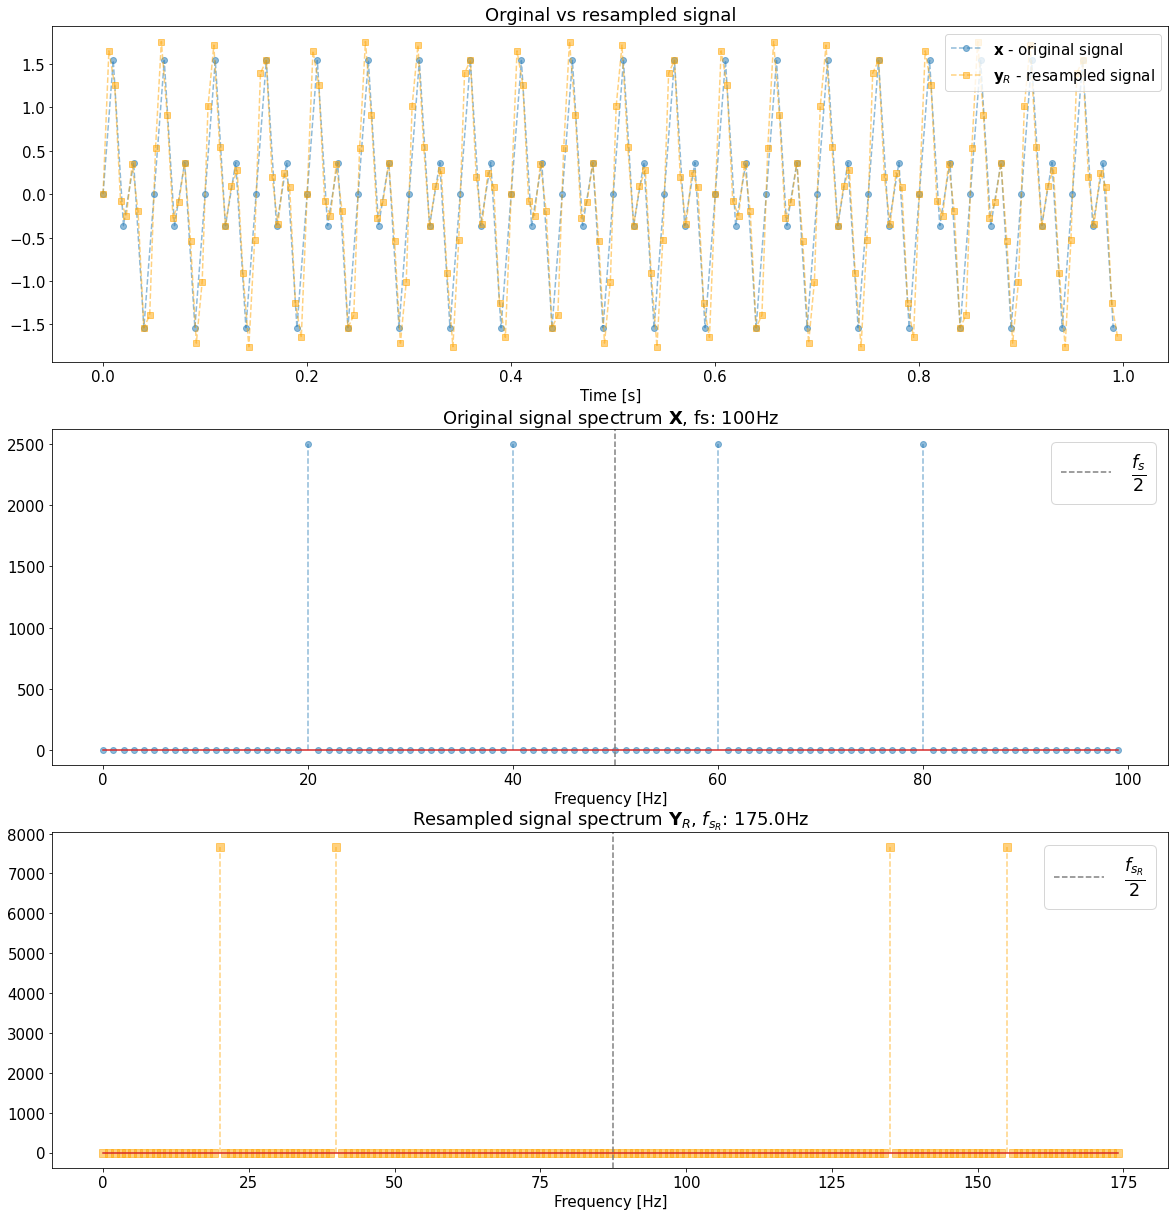

In [260]:
Y_R = np.fft.fft(y_R)
f_R = np.arange(0, fs_R, fs_R/(len(y_R)))


fig, ax = plt.subplots(3, 1, figsize=(20, 21))

ax[0].plot(t, x.real, 'o--', alpha=0.5, label='$\mathbf{x}$ - original signal')
ax[0].plot(t_R, y_R.real, 's--', color="orange", alpha=0.5, label='$\mathbf{y}_R$ - resampled signal')
ax[0].set_title('Orginal vs resampled signal')
ax[0].set_xlabel('Time [s]')
ax[0].legend()

markers, stemlines, baseline = ax[1].stem(f, np.abs(X)**2, use_line_collection=True)
plt.setp(stemlines, linestyle="--", alpha=0.5)
plt.setp(markers, alpha=0.5)
ax[1].axvline(fs/2, linestyle="--", color='grey', label=r'$\frac{f_s}{2}$')
ax[1].set_title('Original signal spectrum $\mathbf{X}$, fs: ' + str(fs) + 'Hz')
ax[1].set_xlabel('Frequency [Hz]')
ax[1].legend(fontsize=25)

markers, stemlines, baseline = ax[2].stem(f_R, np.abs(Y_R)**2, use_line_collection=True)
plt.setp(stemlines, linestyle="--", color="orange", alpha=0.5)
plt.setp(markers, marker='s', markersize=8, color="orange", alpha=0.5)
ax[2].axvline(fs_R/2, linestyle="--", color='grey', label=r'$\frac{f_{s_R}}{2}$')
ax[2].set_title('Resampled signal spectrum $\mathbf{Y}_R$, $f_{s_R}$: ' + str(fs_R) + 'Hz')
ax[2].set_xlabel('Frequency [Hz]')
ax[2].legend(fontsize=25)

plt.rc('font', size=15)
plt.show()

# Polyphase vs FFT resampling
Copy `rpobs` and `bl_signal` functions from the notebook about sampling and paste them below. Using those functions generate two one-second long random band-limitted signals $\mathbf{x}$ and $\mathbf{x}_R$, meaning a signal sampled at 100 Hz and it's version ideally resampled to 105 Hz, respecitvely. Both signals should be created using the same set of parameters, for example `C=100, amp=1, f_s=0, f_e=40`. Place the signals in variables called `x` and `x_R`, timestamps in `t` and `t_R` and sampling fequencies in `fs` and `fs_R`.

In [261]:
"Your code goes below here."
def rpobs(C=100, amp=1, f_s=0, f_e=1):  
    F = np.random.random(C)*(f_e-f_s) + f_s
    A = np.random.random(C)*amp
    P = np.random.randint(0,360,C)
    return F, A, P

signal_params = rpobs(C=100, amp=1, f_s=0, f_e=40)

def bl_signal(t, signal_params):
    [Fr,Am,Ph] = signal_params 
    wynik = np.zeros((np.size(t)))
    for ii in range(0,np.size(t)):
        for i in range(0,np.size(Fr)):
            wynik[ii] = wynik[ii] +  Am[i]*np.sin(t[ii]*Fr[i]+Ph[i])
    return wynik

#First signal
fs = 100
t = np.arange(0,1, 1/fs)
x = bl_signal(t, signal_params)

#Second resampled signal
x_R, t_R = resample(x, 21, 20, t)
fs_R = len(x_R)

### Verify your implementation
Run the above and the below code a few times and look at the RMSE for both methods.

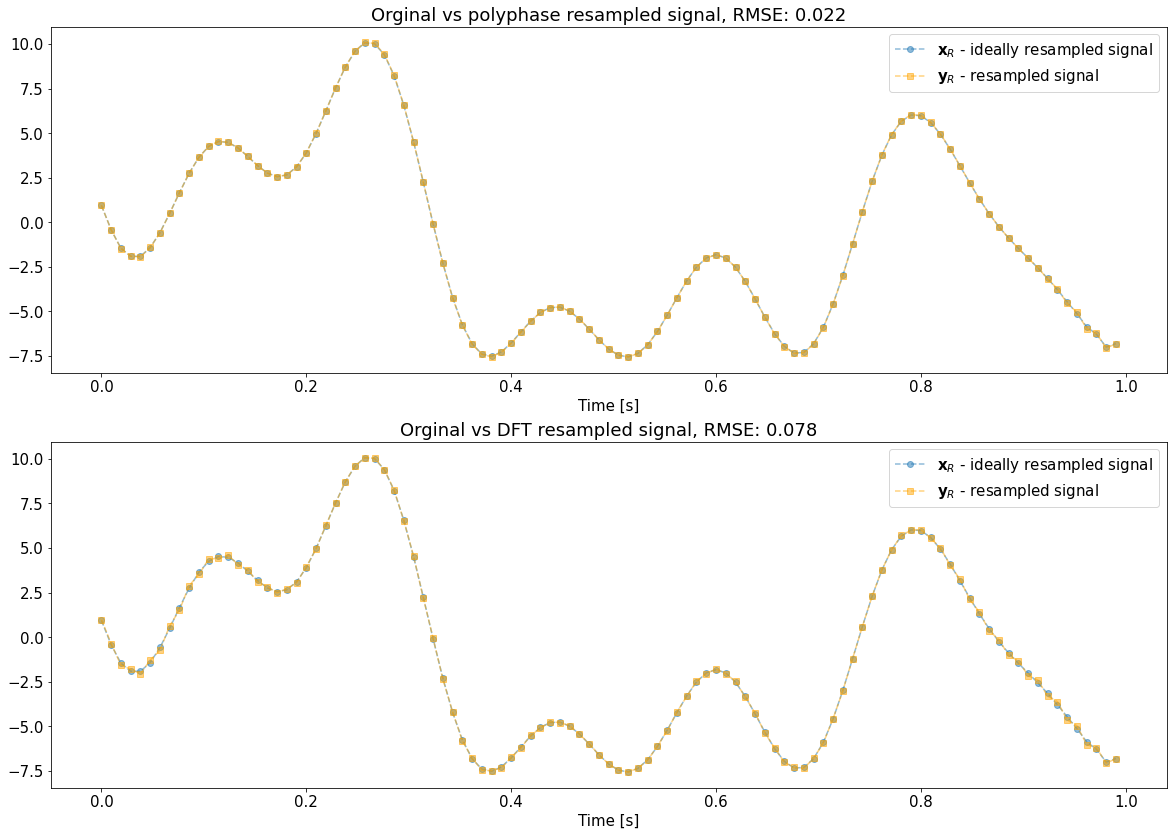

In [263]:
L = 21
K = 20
N = 100

from scipy.signal import resample_poly
y_R_poly, t_R_poly = resample(x, L, K, t)
y_R_poly = resample_poly(x, L, K)
Y_R_poly = np.fft.fft(y_R_poly)

N_R = int(len(x) / fs * fs_R)

y_R_fft, t_R_fft = resample_fft(x, N_R, t)
Y_R_fft = np.fft.fft(y_R_fft)
fs_R_poly = fs*N_R/len(x)
f_R_poly = np.arange(0, fs_R_poly, fs_R_poly/(len(y_R_poly)))

RMSE_poly = round(np.mean((x_R-y_R_poly)**2)**(1/2), 3)
RMSE_fft = round(np.mean((x_R-y_R_fft)**2)**(1/2), 3)


fig, ax = plt.subplots(2, 1, figsize=(20, 14))

ax[0].plot(t_R, x_R, 'o--', alpha=0.5, label='$\mathbf{x}_R$ - ideally resampled signal')
ax[0].plot(t_R_poly, y_R_poly, 's--', color="orange", alpha=0.5, label='$\mathbf{y}_R$ - resampled signal')
ax[0].set_title('Orginal vs polyphase resampled signal, RMSE: ' + str(RMSE_poly))
ax[0].set_xlabel('Time [s]')
ax[0].legend()

ax[1].plot(t_R, x_R, 'o--', alpha=0.5, label='$\mathbf{x}_R$ - ideally resampled signal')
ax[1].plot(t_R_fft, y_R_fft, 's--', color="orange", alpha=0.5, label='$\mathbf{y}_R$ - resampled signal')
ax[1].set_title('Orginal vs DFT resampled signal, RMSE: ' + str(RMSE_fft))
ax[1].set_xlabel('Time [s]')
ax[1].legend()

fig.show()

Create 10Hz sine signals $x$ and $x_R$ sampled at 100 and 105 Hz, respectively. **Make sure they are periodic.** Place the signals in variables called `x` and `x_R`, timestamps in `t` and `t_R` and sampling fequencies in `fs` and `fs_R`.

In [265]:
"Your code goes below here."
fs = 100
fs_R = 105
f = 10

t = np.arange(fs) * 1/fs
x = np.sin(2*np.pi*f*t)

t_R = np.arange(fs_R) * 1/fs_R
x_R = np.sin(2*np.pi*f*t_R)

### Verify your implementation
Check if you properly created the periodic signal. Then look at the RMSE for both methods.

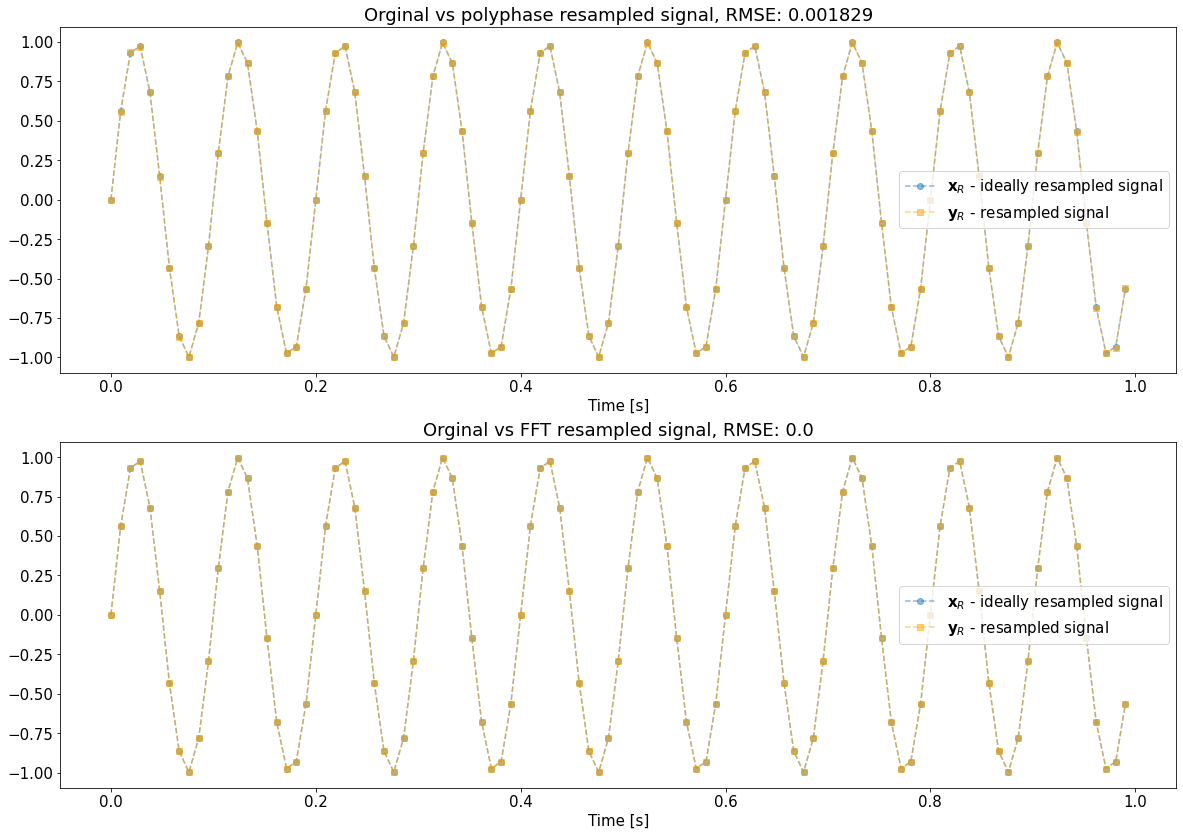

In [266]:
L = 21
K = 20

y_R_poly, t_R_poly = resample(x, L, K, t)
y_R_poly = resample_poly(x, L, K)
Y_R_poly = np.fft.fft(y_R_poly)

N_R = round(len(x) / fs * fs_R)
y_R_fft, t_R_fft = resample_fft(x, N_R, t)
Y_R_fft = np.fft.fft(y_R_fft)
fs_R_poly = fs*N_R/len(x)
f_R_poly = np.arange(0, fs_R_poly, fs_R_poly/(len(y_R_poly)))

RMSE_poly = round(np.mean((x_R-y_R_poly)**2)**(1/2), 6)
RMSE_fft = round(np.mean((x_R-y_R_fft)**2)**(1/2), 6)


fig, ax = plt.subplots(2, 1, figsize=(20, 14))

ax[0].plot(t_R, x_R, 'o--', alpha=0.5, label='$\mathbf{x}_R$ - ideally resampled signal')
ax[0].plot(t_R_poly, y_R_poly, 's--', color="orange", alpha=0.5, label='$\mathbf{y}_R$ - resampled signal')
ax[0].set_title('Orginal vs polyphase resampled signal, RMSE: ' + str(RMSE_poly))
ax[0].set_xlabel('Time [s]')
ax[0].legend()

ax[1].plot(t_R, x_R, 'o--', alpha=0.5, label='$\mathbf{x}_R$ - ideally resampled signal')
ax[1].plot(t_R_fft, y_R_fft, 's--', color="orange", alpha=0.5, label='$\mathbf{y}_R$ - resampled signal')
ax[1].set_title('Orginal vs FFT resampled signal, RMSE: ' + str(RMSE_fft))
ax[1].set_xlabel('Time [s]')
ax[1].legend()

fig.show()

As you can see, when the resampled signal is periodic the error for the DFT interpolation is very close to 0.

# Summary
After finishing this notebook you should be familiar with the downsampling and upsampling operations and their influence on signal spectrum. Moreover you should be able to explain how do the polyphase and the DFT resamplers work.